In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv('E:/DataScience/train.csv') 
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [322]:
#question -1
titanic.tail(6) #shows the last 6 passengers and their informations

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [323]:
#question -2
titanic.columns #shows column names of the features

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [324]:
#question -3
titanic.shape #shows the number of rows and columns in a tuble Our dataS Set has 12 columns and 891 rows

(891, 12)

In [325]:
#question -4
titanic.isnull().sum(axis = 0) #Missing values in: Age = 177, Cabin = 687, Embarked = 2


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

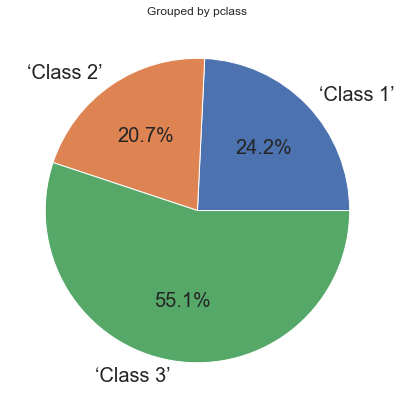

In [326]:
#question -5
import matplotlib.pyplot as plt

#let's find out the distribution of ticket classes where the attribute is stored at Pclass column
pclass_count = titanic.groupby('Pclass')['Pclass'].count()
 #
titanic.groupby('Pclass')['Pclass'].count()
plt.figure(figsize=(7,7))
plt.title("Grouped by pclass")
plt.pie(pclass_count.values, labels=["‘Class 1’", "‘Class 2’", "‘Class 3’"], 
 autopct='%1.1f%%', textprops={'fontsize':20})
plt.show()

#Class 3 has the most passengers and Class 1 then Class 2 follows it


<BarContainer object of 2 artists>

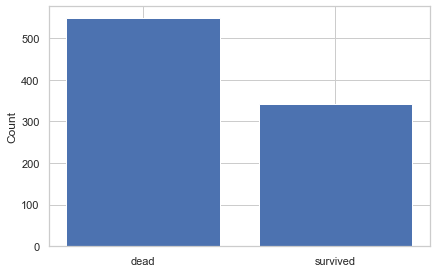

In [327]:
#question -6

# Figure size
plt.rc('figure', figsize=(15, 15))
# Histogram bin size
bin_size = 10
fig = plt.figure() 
fig_size = (3, 2)
plt.subplot2grid(fig_size, (0, 0))
counts= titanic['Survived'].value_counts()
plt.xticks(rotation=0)
plt.ylabel('Count')
whichIsWhich = ["dead", "survived"]
plt.bar(whichIsWhich,counts)

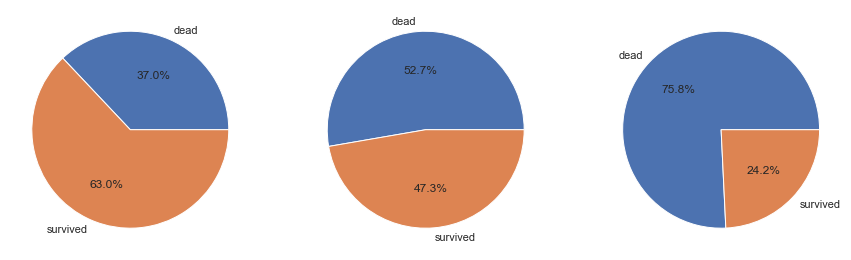

In [328]:
#question -7
labels = ["dead", "survived"]
label = ["Class 1","Class 2", "Class 3" ]
fig, axs = plt.subplots(1,3)
axs[0].pie(titanic[titanic["Pclass"] == 1].groupby(["Survived"]).size(), labels=labels, autopct='%1.1f%%')
axs[1].pie(titanic[titanic["Pclass"] == 2].groupby(["Survived"]).size(), labels=labels, autopct='%1.1f%%')
axs[2].pie(titanic[titanic["Pclass"] == 3].groupby(["Survived"]).size(), labels=labels, autopct='%1.1f%%')

plt.show()



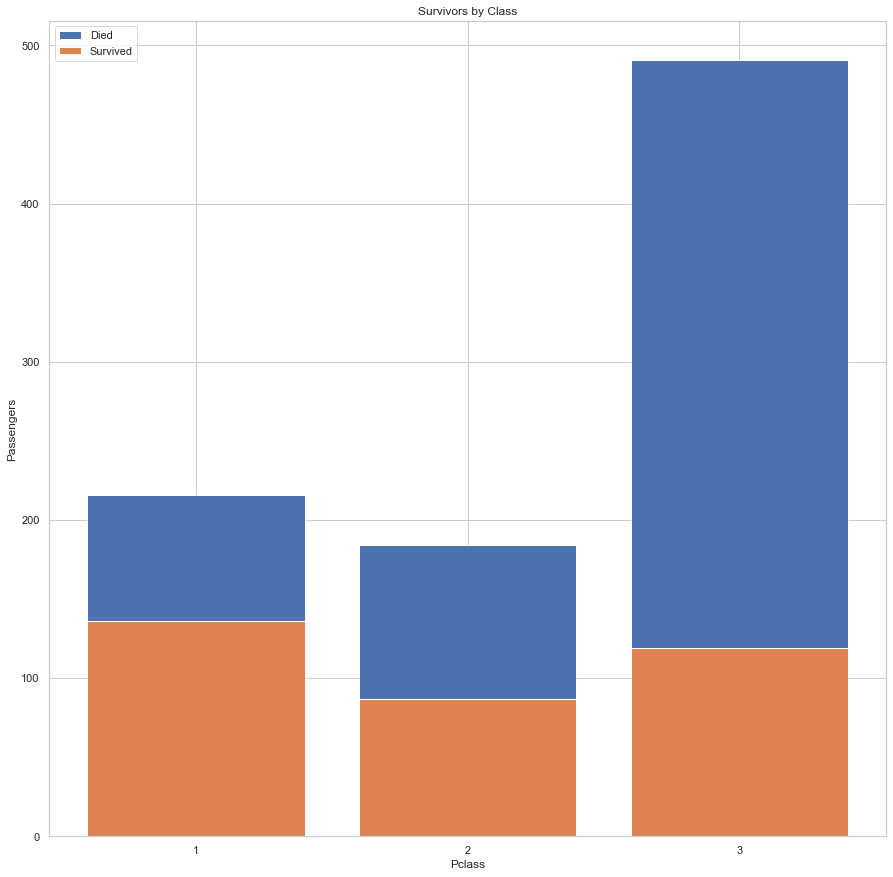

In [329]:
#question -8

survivedTitanicPclass = titanic[['Survived', 'Pclass']] 

# calculate survived by pclass
survivedByPClass = survivedTitanicPclass.groupby(['Pclass']).sum()
totalByPclass = survivedTitanicPclass.groupby(['Pclass']).count()

# total are showed as survived - so change to column name Total
totalByPclass.rename(columns = {'Survived':'Total'}, inplace = True)

# merge separate data into one dataframe
survivedTotalByPclass = pd.merge(survivedByPClass, totalByPclass, left_index=True, right_index=True) # merge by index
survivedTotalByPclass

x = survivedTotalByPclass.index.values
ht = survivedTotalByPclass.Total
hs = survivedTotalByPclass.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, x)
plt.xlabel('Pclass')
plt.ylabel('Passengers')
plt.title('Survivors by Class')


plt.legend([pht,phs],['Died', 'Survived'])

#Class 1 has the most survival rate whereas class 3 has more death rates. It's because the rich ones were privileged even at the time of death


In [330]:
# question -9

pd.crosstab(titanic.Sex, titanic.Survived, margins=True, margins_name = 'All')

#Female gender has the most number of survivors (233)
#Female gender has the least number of deads (81)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<AxesSubplot:title={'center':'Embarked'}>

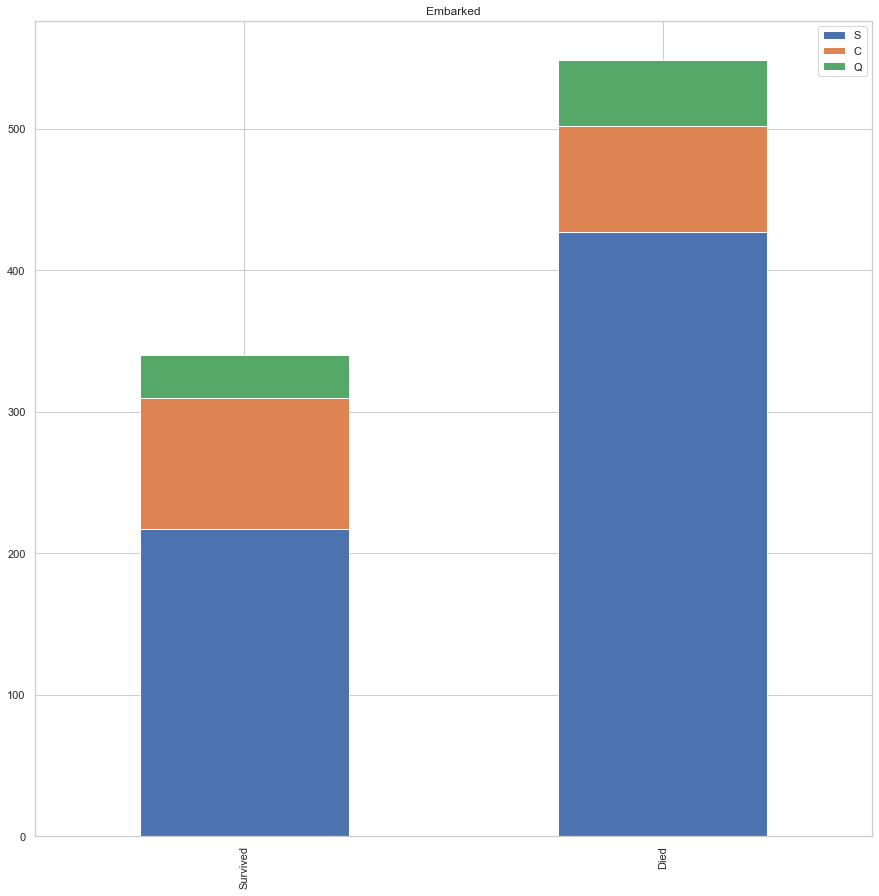

In [331]:
#question -10

survivedTitanicEmbarked = titanic[['Survived', 'Embarked']] 

survived = titanic['Survived']
survivedByEmbarked = survivedTitanicPclass.groupby(['Pclass']).sum()
totalByPclass = survivedTitanicPclass.groupby(['Pclass']).count()

survived = titanic[titanic['Survived']==1]['Embarked'].value_counts()
died = titanic[titanic['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived,died])
df.index=['Survived','Died']
df.plot(kind='bar',stacked=True,fig=(18,6),title='Embarked')



In [332]:
#question -11
bins= [0,18,60,300]
labels = ['Child','Adult','Old']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)
titanic['AgeGroup'].dropna(inplace = True)



pd.crosstab([titanic.Sex, titanic.Survived],titanic.AgeGroup, margins=True, margins_name = 'All')

    
#adults have higher survival rate. it might be due to the fact that there were more adults on the ship than there were children and elderies.


AgeGroup         Child  Adult  Old  All
Sex    Survived                        
female 0            17     47    0   64
       1            38    155    4  197
male   0            35    306   19  360
       1            23     67    3   93
All                113    575   26  714

In [333]:
#question -12



In [334]:
#question -13
titanic['Title']=0
titanic['Title']=titanic.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

#finding out the most used title by using the mode function
titanic.Title.mode()

#the answer is Mr


0    Mr
dtype: object

In [335]:
#question -14
titanic['Title'].nunique() #there are 17 unique titles
a= titanic['Title'].unique()
print (a) #['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady' 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [336]:
#question -15

column = titanic["Age"]
numberOfPeople = 0
sum=0

#going through the age column and adding the age values to sum variable as long as the age value is not NaN
#incrementing the numberOfPeople value by 1 when a age value that is not NaN is added to sum value

for item,value in titanic['Age'].iteritems():
    if pd.notnull(value):
        sum=sum+value
        numberOfPeople +=1

#calculatingthe average
avg = sum/numberOfPeople
print("The average is ", round(avg,2))

#average is 29.7

The average is  29.7


<AxesSubplot:xlabel='Survived', ylabel='Age'>

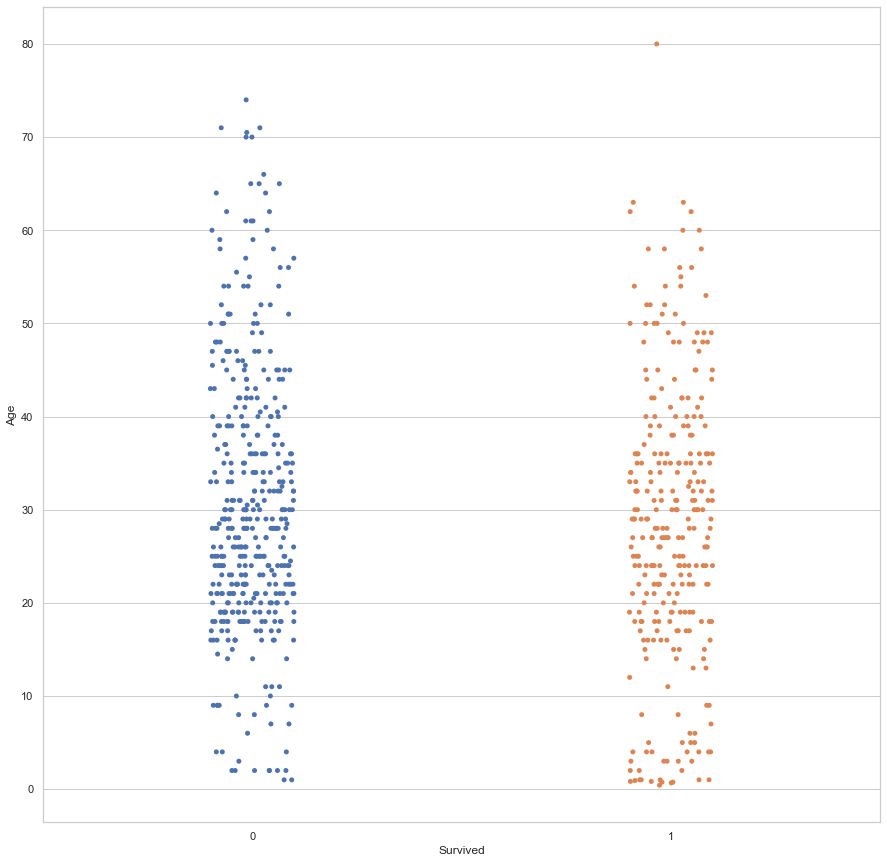

In [337]:
#question -16
# use to set style of background of plot
sns.set(style = 'whitegrid')
sns.stripplot(x="Survived", y="Age", data=titanic, jitter=0.1)

In [338]:
#question -17
column = titanic["Age"]
print(column.max())
#answer is 80

80.0


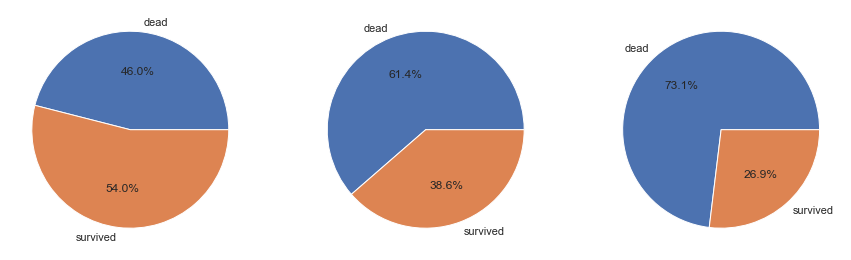

In [339]:
#question -18  question -19

labels = ["dead", "survived"]
label = ["Class 1","Class 2", "Class 3" ]
fig, axs = plt.subplots(1,3)
axs[0].pie(titanic[titanic['AgeGroup'] == 'Child'].groupby(["Survived"]).size(), labels=labels, autopct='%1.1f%%')
axs[1].pie(titanic[titanic['AgeGroup'] == 'Adult'].groupby(["Survived"]).size(), labels=labels, autopct='%1.1f%%')
axs[2].pie(titanic[titanic['AgeGroup'] == 'Old'].groupby(["Survived"]).size(), labels=labels, autopct='%1.1f%%')

plt.show()

#Just a reminder: I have dropped people with missing age data in our AgeGroup in question- 11 #

#Child: dead = 46.0% , survived: 54.0%
#Adult: dead= 61.4% , survived: 38.6%
#Old: dead: 73.1% , survived: 26.9%


In [340]:
#question -20
column = titanic["SibSp"]
print(column.max())
#answer is 8


8
